In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Создаём dataset

In [2]:
def create_dataset(start=0, stop=5, size=1000):
    X = np.linspace(start=start, stop=stop, num=size)
    y = np.exp(X) + np.sin(X)*20
    
    return (X, y)

In [3]:
X, y = create_dataset()

In [4]:
seed = 47

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

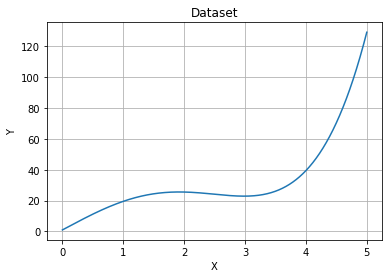

In [6]:
plt.plot(X, y)
plt.grid()
plt.title('Dataset')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [7]:
def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

# Обучаю модель linear regression

In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

## Обучаем модель

In [9]:
history = History()
reg_model = baseline_model()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=128, epochs=1000, callbacks=[history], verbose=0)

## Визуализируем loss на train и val

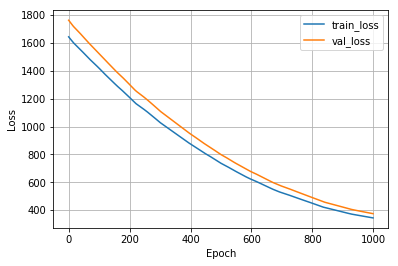

In [10]:
plot_loss(history.history['loss'], history.history['val_loss'])

## Смотрим на качество аппроксимации

In [11]:
y_pred = reg_model.predict(X_test)

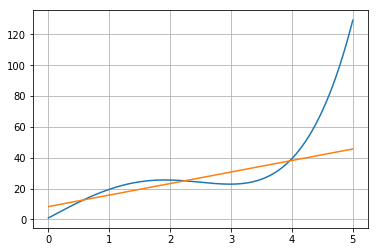

In [12]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()

# Добавляем 1 слой сети

In [13]:
def deep_model_v1():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    model.add(Dense(10, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
history = History()
reg_model = deep_model_v1()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=256, epochs=5000, callbacks=[history], verbose=0)

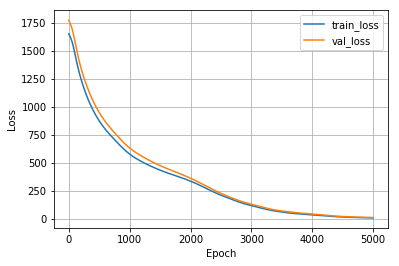

In [15]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [16]:
y_pred = reg_model.predict(X_test)

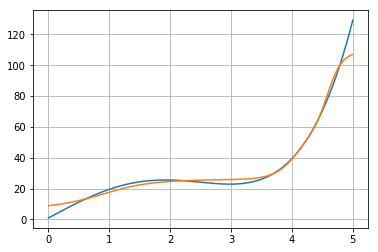

In [17]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()

## Добавляем ещё 1 слой сети

In [18]:
def deep_model_v2():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    model.add(Dense(100, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

In [24]:
X_train.shape

(670,)

In [19]:
history = History()
reg_model = deep_model_v2()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=1000, callbacks=[history])

Train on 670 samples, validate on 330 samples
Epoch 1/1000
670/670 [==============================] - 0s 610us/step - loss: 1624.5148 - val_loss: 1699.6051
Epoch 2/1000
670/670 [==============================] - 0s 16us/step - loss: 1560.1417 - val_loss: 1639.9979
Epoch 3/1000
670/670 [==============================] - 0s 26us/step - loss: 1505.6243 - val_loss: 1586.0860
Epoch 4/1000
670/670 [==============================] - 0s 18us/step - loss: 1455.5637 - val_loss: 1534.6616
Epoch 5/1000
670/670 [==============================] - 0s 14us/step - loss: 1407.2980 - val_loss: 1486.4600
Epoch 6/1000
670/670 [==============================] - 0s 28us/step - loss: 1363.4152 - val_loss: 1440.9313
Epoch 7/1000
670/670 [==============================] - 0s 17us/step - loss: 1319.8629 - val_loss: 1396.2359
Epoch 8/1000
670/670 [==============================] - 0s 23us/step - loss: 1278.1104 - val_loss: 1352.0774
Epoch 9/1000
670/670 [==============================] - 0s 23us/step - loss: 1237

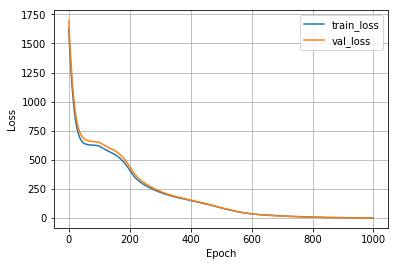

In [20]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [21]:
y_pred = reg_model.predict(X_test)

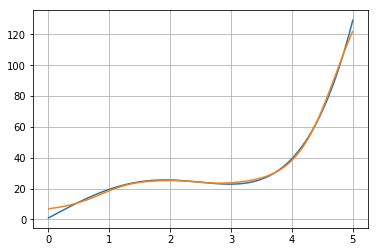

In [22]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()